# 16장 비지도학습과 주성분 분석
 
자료 출처: [ISLP (An Introduction to Statistical Learning with Applications in Python)](https://www.statlearning.com/)

## 16.1 개요

이 책의 대부분은 회귀 및 분류와 같은 **지도학습**(supervised learning)에 관한 것이다. 지도학습은 일반적으로 예측변수 또는 특성(feature)이 $p$개(즉 $X_1,X_2,...,X_p$)가 있고, 반응변수 $Y$가 있는 상황에서 $X_1,X_2,...,X_p$를 사용하여 $Y$를 예측하는 것을 목표로 한다.

이 장에서는 이러한 지도학습 대신 반응변수는 없고 $X_1,X_2,...,X_p$의 특성 세트만 있는 **비지도학습**(unsupervised learning)에 초점을 맞춘다. 비지도학습은 관련된 반응변수 $Y$가 없기 때문에 예측에는 관심이 없다. 그 대신 비지도학습의 목표는 $X_1,X_2,...,X_p$의 측정값에 대해 어떤 흥미로운 점들을 발견하는 것이다. 예를 들어, 데이터를 시각화하는 좋은 방법이 있는지, 그리고 변수 또는 관측 사이에 어떤 부분그룹들(subgroups)을 찾을 수 있는지 등이다. 비지도학습은 이와 같은 질문에 답하기 위한 다양한 기법을 말한다. 

지금까지 살펴본 지도학습은 잘 알려진 영역이다. 예를 들어, 데이터세트에서 이항(binary) 결과를 예측(즉 분류)하는 것이 목표라면, 여러 가지 잘 개발된 도구(예: 로지스틱 회귀, 분류 트리, 서포트 벡터 머신 등)를 사용할 수 있다. 또한 분류 성과를 평가하는 방법에 있어서도 교차검증(cross-validation)이나 검증 세트를 이용하는 등 명확한 방법들이 있다.

이에 반해, 비지도학습은 훨씬 더 도전적인 분야이다. 반응을 예측하는 것과 같은 어떤 정해진 목표가 없으며, 접근이 보다 주관적인 경향이 있다. 비지도학습은 종종 **탐색적 데이터 분석**(exploratory data analysis)의 일부로 수행된다. 또한 교차검증이나 검증 세트 등 분석 결과를 검증하기 위해 보편적으로 허용되는 메커니즘이 없기 때문에 비지도학습 기법에서 얻은 결과를 평가하기 어렵다. 이러한 차이가 발생하는 이유는 간단하다. 지도학습 기법을 사용하여 예측 모델을 피팅하면, 모델 피팅에 사용되지 않은 관측을 이용하여 모델의 예측 성과를 쉽게 평가할 수 있다. 그러나 비지도학습에서는 올바른 답을 알지 못하기 때문에 우리의 작업 성과를 확인할 방법이 없다. 한마디로 비지도(unsupervised)가 어려움을 낳는 원인이다.

비지도학습 기법은 여러 분야에서 중요성이 커지고 있다. 가령 어떤 **암 연구자**가 유방암 환자 100명의 유전자 발현(gene expression) 데이터를 분석한다. 암에 대해 더 잘 알기 위해 유방암 샘플 또는 유전자와 같은 것에서 비슷한 성질을 지닌 부분그룹(subgroup)을 찾으려는 것이 분석의 목표라면 이런 것이 비지도학습의 예이다. 다른 예로 **온라인 쇼핑 사이트**는 브라우징 및 구매 이력이 유사한 사용자 그룹을 찾아내고, 각 그룹 내에서 사용자들이 특히 관심을 갖는 아이템을 식별하는 것이 중요하다. 이를 통해 어떤 사용자에게 다른 유사한 사용자들의 구매 이력을 기반으로 이들이 특히 관심을 가질 가능성이 있는 아이템을 우선적으로 보여줄 수 있다. 또 다른 예로 **검색 엔진**은 유사한 검색 패턴을 지닌 다른 개인의 클릭 기록을 기반으로 특정 개인에게 제시할 검색 결과를 선택할 수 있다. 이러한 통계적 학습 과제들은 비지도학습 기법을 통해 수행된다.

이 장에서는 대규모 변수 집합에서 저차원 변수 집합을 도출하는 데 널리 사용되는 **주성분 분석**(**PCA**: principal components analysis)에 대해 살펴본다. PCA는 입력변수의 차원을 축소시켜 회귀분석을 수행하는 지도학습에서도 사용된다. 소위 **주성분 회귀**(principal components regression) 분석이다. 하지만 이 장에서는 비지도 데이터 탐색(unsupervised data exploration)을 위한 도구로서의 PCA에 주로 초점을 맞춘다. 즉 데이터의 차원을 축소시켜 데이터를 시각화한다든지 또는 클러스터링(clustring), 노이즈 필터링(noise filtering), 특성 추출(feature extraction) 등을 위한 PCA이다.

## 16.2 주성분의 개념

**주성분 분석**(PCA: principal component analysis)을 단순화시켜 설명하면 다음과 같다. 어떤 데이터세트가 있을 때, 우리는 해당 데이터를 가장 잘 대표하는 소위 **주성분**(principal components)을 찾아낼 수 있다. 특성 $X_1,X_2,...,X_p$가 있고, 이들에 대해 $n$개 관측이 있을 때, 우리는 최대 ${\rm min}(n − 1, p)$개 주성분을 찾을 수 있는데, 가령 원래 데이터세트의 변수 개수가 100개이면, (관측 개수가 변수 개수보다 많다고 했을 때) 주성분을 100개까지 찾을 수 있다. 이때 첫 번째 주성분이 해당 데이터세트의 특징을 가장 잘 대표하는 가장 중요한 주성분이고, 두 번째 주성분이 그 다음으로 중요한 주성분이고, 이런 식으로 100번째 주성분까지 도출할 수 있다. 이렇게 100개의 주성분이 도출되면, 결국 이들 100개의 주성분 전체는 원래 데이터세트의 모든 특징을 하나도 빠짐없이 담고 있게 된다. 

그런데 여기에서 핵심적인 부분은 첫 번째 주성분이 가장 중요하고, 마지막 100번째 주성분이 가장 덜 중요하다는 점이다. 바로 이 점 때문에 주성분 분석이 변수의 차원축소 도구로 사용될 수 있다. 이것은 마치 원래 데이터세트의 100개 변수를 용광로 같은 곳에 집어넣어 거기에서 주성분이라는 이름의 또 다른 100개 변수를 뽑아내는 작업에 비유할 수 있다. 그런데 만약 그렇게 해서 뽑아낸 처음 10개의 주성분에 원래 데이터세트가 갖고 있는 대부분의 특징 또는 정보가 들어있다면, 원래 100개의 변수 대신 (약간의 정보 손실을 감수하면서) 10개의 주성분만을 사용함으로써 변수의 개수를 대폭 줄일 수 있는 것이다.

가장 간단한 예로서 변수가 2개만 있는 경우를 생각해보자. 100개 도시에 제품을 파는 어떤 회사가 있는데, 도시별로 광고지출이 다르다. 우리에게 주어진 데이터세트는 각 도시별 인구규모($pop$: 만명)와 해당 회사의 광고지출($ad$: 천달러)에 관한 것이다. 이 경우 $p=2$이고, $n=100$이다. 

아래 그림 16.1은 이들 2개 변수간의 관계를 산점도로 그린 것이다. 여기에서 주성분 분석이 제공하는 것은 데이터세트에 가장 잘 피팅하는 **주성분 직선**(line) 또는 방향(direction)이다. 이것을 간단히 **주축**(principal axes)이라고도 한다. 그림에서 우상향의 녹색 실선으로 표시된 것이 바로 주어진 데이터의 **첫 번째 주성분 직선**이다. 눈으로 보기에도 녹색선이 주어진 데이터 포인트들을 가장 잘 대표하는 직선으로 여겨진다. 이 첫 번째 주성분 직선은 각 점과 직선 사이의 수직 거리의 제곱합을 최소화하는 방법으로 찾는다. 

**그림 16.1.** 100개의 도시에 대한 인구규모($pop$) 및 광고지출($ad$)이 보라색 동그라미 점으로 표시돼있다. 녹색 실선은 첫 번째 주성분 직선을 나타내고, 파란색 점선은 두 번째 주성분 직선을 나타낸다.

![광고 데이터 주성분 직선](https://raw.githubusercontent.com/pilsunchoi/images/main/16-1.png)

- 그림 출처: ISLP, FIGURE 6.14

위 예에서는 변수가 2개만 있기 때문에 주성분 직선은 2개의 숫자만으로 표현할 수 있다. 즉 (0.839, 0.544)이다. 여기에서 첫 번째 숫자 0.839는 $pop$ 변수에 대한 숫자이고, 0.544는 $ad$ 변수에 대한 숫자이다. 한 마디로 이 숫자들은 그림에서 녹색선의 기울기를 알려준다. 즉 가로축으로 0.839만큼 간 다음, 거기에서 세로축으로 0.544만큼 가는 기울기를 갖는다는 것이다. 그것이 첫 번째 주성분 직선이다. 아래에서 다시 설명이 나오지만, 주성분 직선을 (0.839, 0.544)와 같이 표현할 때, 이것을 주성분의 **부하량**(loading) 벡터, 또는 **고유벡터**라고 칭한다.

그림 16.1에서 녹색선으로 표현된 첫 번째 주성분의 부하량 벡터가 (0.839, 0.544)으로 주어지는 경우, 이를 이용한 다음과 같은 변수를 생각해보자.  

$$
Z_{1} = 0.839\cdot(pop-\overline{pop}) + 0.544 \cdot (ad-\overline{ad}) \tag{16.1}
$$ 

이 식에서 $\overline{pop}$는 $pop$ 평균값이고, $\overline{ad}$는 $ad$ 평균값이다. 위 식으로 표현된 $Z_{1}$을 **첫 번째 주성분 점수**(principal component score)라고 부른다. 첫 번째 주성분 **변수**라고 부를 수도 있다. 이로써 우리는 PCA를 통해 변수가 2개 있는 2차원의 데이터세트로부터 그 특징을 가장 잘 대표하는 첫 번째 주성분 변수 $Z_{1}$을 뽑아낸 것이다. 만약 원래의 데이터세트 대신 첫 번째 주성분 변수만 사용한다면, 입력변수의 차원을 2차원에서 1차원으로 축소한 것이 된다. 결국 $pop$와 $ad$ 두 변수의 **선형결합**(linear combination)에 의해 이들의 특징을 가장 잘 포착하는 $Z_{1}$이라는 새로운 변수(즉 첫 번째 주성분 변수)를 도출한 것이다.

위 예에서 데이터세트의 관측 개수가 100개($n = 100$)이므로 $pop$와 $ad$는 각각 길이가 100인 벡터이고, 식 16.1의 $Z_1$ 역시 길이가 100인 벡터이다. $Z_1$의 개별 원소인 $z_{11},...,z_{n1}$, 즉 주성분 점수를 식으로 표현하면 다음과 같다. 

$$
z_{i1} = 0.839 \cdot (pop_i-\overline{pop}) + 0.544 \cdot (ad_i-\overline{ad}) \tag{16.2}
$$ 

아래 그림 16.2의 왼쪽 패널에서 녹색선 위의 x 표시는 첫 번째 주성분 직선에 대한 각 데이터 포인트의 수직 **투영**(projection, 또는 정사영)을 나타낸다. 앞에서도 언급했지만, 첫 번째 주성분 직선은 각 데이터 포인트와 직선 사이의 수직 거리의 제곱합을 최소화하는 방법으로 찾는다. 즉 첫 번째 주성분은 원래의 데이터 포인트와 그것의 투영된 점들이 **최대한 가깝도록** 선택된다. 그래야만 주성분이 데이터 포인트의 특징을 가장 잘 대표할 수 있기 때문이다.

한편, 그림 16.2의 오른쪽 패널은 첫 번째 주성분 방향(즉 녹색선)을 수평으로 만들기 위해 왼쪽 패널을 45도 정도 오른쪽으로 회전시킨 것이다. 이 오른쪽 패널에서 녹색선 상에 표시된 x 표시의 가로축 값이 바로 식 16.2의 $z_{i1}$, 즉 $i$번째 관측에 대한 첫 번째 주성분 점수이다. 예를 들어, 그림에서 왼쪽 패널의 왼쪽 하단 모서리에 있는 점은 식 16.2에 따르면 $z_{i1} = −26.1$으로서 큰 음의 주성분 점수를 갖는다. 이 값이 그림에서 무엇에 해당하냐면, 해당 데이터 포인트를 녹색선에 투영시킨 x 표시에서 $pop$ 및 $ad$의 평균값을 나타내는 중앙의 파란색 원까지의 거리이다. 

**그림 16.2.** 그림을 간단히 하기 위해 광고 데이터세트 전체 관측이 아니라 일부만을 표시해 놓았다. 중앙 부분에 표시된 파란색 원은 $pop$ 및 $ad$의 평균값이다. 왼쪽: 첫 번째 주성분 직선이 녹색으로 표시돼 있다. 녹색선이 첫 번째 주성분 직선이라는 것은 데이터 포인트들을 녹색선에 투영시켰을 때 데이터의 변동성이 가장 커진다는 것을 의미한다. 녹색선은 모든 $n$개 데이터 포인트에 가장 가까운 직선, 즉 데이터를 가장 잘 대표하는 직선이기도 하다. 오른쪽: 첫 번째 주성분 방향이 가로축과 일치하도록 왼쪽 패널을 45도 정도 오른쪽으로 회전시켜 놓았다. 

![광고 데이터 주성분](https://raw.githubusercontent.com/pilsunchoi/images/main/16-2.png)

- 그림 출처: ISLP, FIGURE 6.15

위 식 16.2에서 $pop$과 $ad$의 모든 가능한 선형결합, 즉 $\phi_{11}\cdot pop + \phi_{21}\cdot ad$에서 $\phi_{11}=0.839$ 및 $\phi_{21}=0.544$일 때, 주성분 점수의 변동성(분산)이 가장 크다. 즉 ${\rm Var} \left( \phi_{11} \cdot (pop-\overline{pop}) + \phi_{21} \cdot (ad-\overline{ad}) \right)$가 최대가 된다. 단, 이때 $\phi_{11}^2 + \phi_{21}^2 = 1$의 조건이 부과되는데, 이 조건을 만족하는 모든 선형결합 중 위 결과가 주성분 점수의 변동성을 가장 크게 만든다는 것이다. 이처럼 변동성을 가장 크게 만드는 선형결합을 찾는 이유는 그래야만 개별 변수들의 특징(변동성)을 가장 잘 포착할 수 있으며, 그것을 통해 데이터 포인트들을 가장 잘 대표하는 성분을 찾을 수 있기 때문이다. 여기에서 $\phi_{11}^2 + \phi_{21}^2 = 1$의 조건을 부과하는 이유는 그렇게 하지 않으면 $\phi_{11}$과 $\phi_{21}$의 값을 무한히 키우는 것만으로도 선형결합의 분산을 무한히 키울 수 있기 때문이다. 

첫 번째 주성분 점수, 즉 $z_{i1}$은 $pop$ 및 $ad$ 두 개의 변수값을 **하나의 숫자로 요약한 것**으로 생각할 수 있다. 이때 주성분 분석에 의해 도출한 하나의 숫자가 두 개 변수의 특징을 가급적 잘 포착할 수 있기 위해서는 그림 16.1에서 보았듯이 $pop$과 $ad$의 관계를 가장 잘 대표할 수 있도록 직선(즉 녹색선)을 도출해야 한다. 주성분이 실제로 그런 역할을 잘 하는지 알아보기 위해 아래 그림 16.3은 첫 번째 주성분 점수인 $z_{i1}$을 가로축으로 하고 $pop$ 및 $ad$를 세로축으로 하여 둘 사이의 관계를 표시한 것이다. 그림에서 알 수 있듯이 첫 번째 주성분 변수와 $pop$, 그리고 첫 번째 주성분 변수와 $ad$가 모두 강한 관계를 보인다. 달리 표현하면, 첫 번째 주성분은 $pop$ 및 $ad$의 두 가지 특성(feature)에 포함된 정보를 (주성분 하나만으로도) 아주 잘 보존하고 있는 것이다.

**그림 16.3.** $pop$ 및 $ad$와 첫 번째 주성분 점수 $z_{i1}$과의 관계: 상당히 관계가 강한 편이다.

![관계가 강함](https://raw.githubusercontent.com/pilsunchoi/images/main/16-3.png)

- 그림 출처: ISLP, FIGURE 6.16

지금까지 우리는 첫 번째 주성분만 다뤘다. 그런데 변수가 $p$개이면, 일반적으로 최대 $p$개의 주성분을 뽑아낼 수 있다. 우리 예에서는 변수가 2개이므로 위에서 설명한 첫 번째 주성분 외에 또 하나의 주성분을 찾을 수 있다. 두 번째 주성분 변수 $Z_2$는 $Z_1$과 선형의 상관관계가 없어야 한다는 제약 조건이 추가되는 것을 제외하면 첫 번째 주성분을 찾을 때와 동일한 방식이 적용된다. 

동일한 방식으로 얻은 **두 번째 주성분 직선**이 위 첫 번째 그림 16.1에 파란색 점선으로 표시돼 있다. $Z_1$과 $Z_2$의 상관관계가 0이라는 조건은 두 번째 주성분 직선이 첫 번째 주성분 직선에 **직교**(perpendicular 또는 orthogonal)해야 한다는 조건과 동일하다. 그렇게 해서 찾은 두 번째 주성분 변수는 다음과 같다. 

$$
Z_{2} = 0.544 \cdot (pop-\overline{pop}) + 0.839 \cdot (ad-\overline{ad})
$$ 

우리 데이터세트에는 변수가 2개이므로 이상에서 설명한 두 개의 주성분에 $pop$ 및 $ad$에 있는 모든 정보가 포함된다. 그런데 두 개의 주성분끼리 비교하면 첫 번째 주성분에 훨씬 많은 정보가 포함돼 있다. 그것을 잘 보여주는 것이 위 그림 16.2의 오른쪽 패널이다. 여기에서 녹색선 상의 x 표시를 가로축으로 읽은 것이 첫 번째 주성분 점수 $z_{i1}$이고, 각 데이터 포인트와 녹색선과의 거리(검은색 점선으로 표시)가 두 번째 주성분 점수 $z_{i2}$이다. 그림에서 보듯이 첫 번째 주성분 점수의 변동성(분산)이 훨씬 큰 것을 알 수 있는데, 이것이 바로 첫 번째 주성분이 훨씬 많은 정보를 포착한다는 것을 의미한다. 

아래 그림 16.4는 두 번째 주성분 점수인 $z_{21}$을 가로축으로 하고 $pop$ 및 $ad$를 세로축으로 하여 둘 사이의 관계를 표시한 것이다. 그림에서 알 수 있듯이 두 번째 주성분과 $pop$ 및 $ad$의 관계는 상당히 약한 편이다.  

**그림 16.4.** $pop$ 및 $ad$와 두 번째 주성분 점수 $z_{i2}$와의 관계: 상당히 관계가 약한 편이다.

![관계가 약함](https://raw.githubusercontent.com/pilsunchoi/images/main/16-4.png)

- 그림 출처: ISLP, FIGURE 6.17

### ChatGPT Q&A

>**어떤 주어진 데이터세트에서 도출한 첫 번째 주성분이 무슨 의미를 지니는지 쉽고 간단히 설명해줘. 또한 첫 번째 주성분과 두 번째 주성분은 어떤 관계인지에 대해서도.**

---

>주성분 분석(PCA)에서 첫 번째 주성분은 주어진 데이터세트의 변동성(variability)을 가장 많이 설명하는 방향입니다. 다시 말해, 데이터가 이 방향으로 가장 넓게 퍼져 있으며, 이를 통해 데이터 세트 내의 가장 중요한 패턴이나 구조를 포착할 수 있습니다. 첫 번째 주성분은 데이터 세트의 주요 차이나 변동을 잡아내는 데 사용됩니다.
>
>두 번째 주성분은 첫 번째 주성분과 완전히 직교(orthogonal)하며, 첫 번째 주성분으로 설명되지 않는 다음으로 큰 변동성을 설명합니다. 이는 두 번째 주성분이 첫 번째 주성분과는 전혀 다른 차원의 정보를 제공한다는 것을 의미합니다. 두 번째 주성분은 첫 번째 주성분에 수직인 방향으로 데이터의 분산이 최대가 되는 방향입니다.
>
>간단히 말해서, 첫 번째 주성분은 데이터에서 가장 많은 정보를 담고 있는 방향을 나타내고, 두 번째 주성분은 첫 번째 주성분에 직각을 이루면서 남은 정보 중 가장 많은 정보를 담고 있는 방향을 나타냅니다. 이렇게 PCA는 데이터 세트를 구성하는 여러 변수들 사이의 상관관계를 이해하고, 이를 몇 개의 주성분으로 요약하여 데이터의 구조를 간략화하는 데 유용합니다.

## 16.3 주성분 도출

데이터세트가 $p$개의 변수 $X_1,X_2, . . . ,X_p$에 대해 $n$개의 관측이 있다고 하자. 가령 탐색적 데이터 분석의 일환으로 이 데이터세트를 시각화하려고 한다. 그런데 변수가 3개만 넘어도 이를 시각화할 수 없다. 사실 3차원 그림도 입체적으로 그려야 하기 때문에 시각적 표현이 번거롭다. 그래서 보통 우리는 데이터를 2차원 산점도(scatterplot)로 시각화를 수행한다. 산점도에는 두 개의 변수에 대해 $n$개의 관측값이 표시된다. 따라서 변수가 $p$개일 때, 두 개씩의 모든 변수 조합을 고려하려면, 산점도가 $\binom{p}{2}=p(p-1)/2$개가 필요하다. 예를 들어, $p = 100$인 경우 산점도 개수는 총 4,950개나 된다. $p$가 크면 모든 것을 자세히 따져 보는 것은 사실상 불가능할 것이다. 게다가, 각 산점도들은 데이터세트에 존재하는 전체 정보의 작은 부분만을 포함하고 있기 때문에 그들 중 일부는 그다지 유익하지 않을 가능성이 크다. $p$가 클 때 $n$개 관측을 시각화하려면 분명히 더 나은 방법이 필요하다. 즉, 가능한 많은 정보를 포착하는 데이터의 저차원 표현(low-dimensional representation)이 필요하다. 예를 들어, 데이터세트에 들어있는 대부분의 정보를 포착할 수 있는 데이터의 2차원 표현을 구해, (바라건대) 이 2차원 공간에 모든 관측을 표시할 수 있다면 아주 유용할 것이다.

PCA가 바로 이런 것을 수행하는 도구이다. PCA는 주어진 데이터세트로부터 가능한 많은 변동(variation)을 내포하는 저차원 표현을 찾는 도구이다. 직관적으로 표현하면, **많은 변동**이라는 것은 **많은 정보**를 의미한다고 보면 된다. 데이터 포인트들을 주성분 직선에 투영시킨 소위 주성분 값(점수)들이 서로 최대한 넓게 퍼져 있어야 해당 주성분 직선이 해당 데이터의 특징을 잘 포착하는 것을 의미하기 때문이다. 

PCA의 기본 아이디어는 이렇다. $n$개 관측값이 $p$차원(dimension) 공간에 있는데, 이들 차원이 모두 똑같이 흥미롭지는 않다는 것이다. PCA는 가능한 흥미로운 **소수의 차원을 찾는** 방법이다. 여기서 흥미롭다(interesting)는 개념은 PCA에 의해 구한 각 차원에서의 관측값(즉 투영)이 얼마나 변동하는지에 의해 측정된다. PCA의 각 차원은 $p$개 변수의 선형결합(linear combination)에 의해 구한다. 

그렇다면 구체적으로 **주성분**을 어떻게 찾는지 그 방법을 알아보자. 변수 집합 $X_1,X_2, . . . ,X_p$의 **첫 번째 주성분**은 변수들의 정규화된(normalized) 선형결합 중 분산(즉 변동)이 가장 큰 것을 말한다. 식으로 표현하면 다음과 같다. 

$$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p \tag{16.3}
$$ 

여기에서 **정규화**는 $\sum_{j=1}^{p} \phi_{j1}^2 = 1$를 의미한다. 그리고 $\phi_{11},...,\phi_{p1}$을 첫 번째 주성분의 **부하량**(loading)이라고 부른다. 또한 $\phi_{1} = (\phi_{11} \ \phi_{21} \ ... \ \phi_{p1})^T$를 첫 번째 주성분 부하량 벡터라고 부른다. 

위 식에서 보듯이 부하량은 선형결합에 있어서 각 변수의 계수이기 때문에 주성분 변수(점수)에 있어서 각 변수의 중요도 또는 기여도를 의미한다고 할 수 있다. 부하량을 구할 때, 정규화 조건(즉 부하량의 제곱합이 1이라는 조건)을 두는 이유는 그렇지 않으면 각 부하량의 절대값을 키우는 것만으로도 분산을 무한히 키울 수 있기 때문이다.

구체적으로 $n \times p$ 데이터세트 $\mathbf{X}$가 주어졌을 때, 첫 번째 주성분을 찾는 방법은 다음과 같다. 우선 우리는 분산에만 관심이 있기 때문에 $\mathbf{X}$의 모든 개별 변수의 평균이 0이 되도록 만든다. 그런 다음, 정규화 조건 $\sum_{j=1}^{p} \phi_{j1}^2 = 1$ 하에서 다음의 선형결합 중 $z_{i1}$(여기에서 $i=1,...,n$)의 표본분산을 가장 크게 만드는 $\phi_{11},\phi_{21},...,\phi_{p1}$을 구한다.

$$
z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \dots + \phi_{p1}x_{ip} \tag{16.4}
$$ 

이렇게 해서 구한 첫 번째 주성분 벡터 $z_{i1}$, 즉 $z_{11},...,z_{n1}$이 첫 번째 주성분 점수이다.  

지금까지 설명한 첫 번째 주성분을 기하학적으로 해석하면 다음과 같다. $\phi_{11},\phi_{21},...,\phi_{p1}$을 원소로 하는 부하량 벡터 $\phi_1$은 $p$차원의 변수 공간에서 데이터의 변동성이 가장 큰 방향(direction)으로 정의된다. 즉 부하량 벡터는 위에서 설명한 주성분 직선에 해당한다. $n$개의 데이터 포인트 $x_{1},...,x_{n}$을 해당 주성분 직선에 투영하면 그 값이 주성분 점수 $z_{11},...,z_{n1}$이 된다. 앞의 그림 16.1에서 광고 데이터세트의 첫 번째 주성분 직선은 녹색선이고, 식 16.2에서 볼 수 있듯이 부하량은 $\phi_{11}=0.839$ 및 $\phi_{21}=0.544$이다.

데이터세트의 첫 번째 주성분 $Z_1$이 결정되면, 두 번째 주성분 $Z_2$를 찾을 수 있다. 두 번째 주성분은 $Z_1$과 선형의 상관관계가 없는 모든 선형결합 중에서 최대 분산을 갖는 $X_{1},...,X_{p}$의 선형결합이다. 그런 식으로 두 번째 부하량 벡터 $\phi_2$를 구하면 **두 번째 주성분 점수** $z_{12},z_{12},...,z_{n2}$는 다음과 같이 표현된다.

$$
z_{i2} = \phi_{12}x_{i1} + \phi_{22}x_{i2} + \dots + \phi_{p2}x_{ip} \tag{16.5}
$$ 

여기서 $\phi_{2}$는 $\phi_{12},\phi_{22},...,\phi_{p2}$를 원소로 하는 두 번째 주성분 부하량 벡터이다. $Z_2$를 $Z_1$과 상관관계가 없도록 제한하는 것은 $\phi_{2}$ 벡터를 $\phi_{1}$ 벡터에 **직교**(orthogonal)하도록 제한하는 것과 같다. 앞의 그림 16.1의 예에서 관측이 2차원 공간에 있으므로(즉 $p = 2$이므로) $\phi_{1}$을 찾으면 $\phi_{2}$에 대한 가능성은 단 하나이며, 그림에서 파란색 점선이 그것이다. $\phi_{2}$를 찾는 것은 $\phi_{2}$가 $\phi_{1}$에 직교한다는 제약 조건만 추가하고, 나머지는 $\phi_{1}$을 찾을 때와 동일하다. 이렇게 해서 찾은 것이 앞에서도 나왔듯이 $\phi_{12}=0.544$ 및 $\phi_{22}=−0.839$이다. $p > 2$ 변수를 가진 더 큰 데이터 세트에는 2개보다 많은 주성분이 있다. 이미 두 번째 주성분까지는 설명했고, 세 번째 이후의 주성분을 찾는 것도 마찬가지 방식으로 정의된다. 

이상은 주성분 도출을 직관적으로 설명한 것이고, 그렇다면 실제로 주성분을 어떻게 구하냐면, 선형대수(linear algebra)의 표준적 기법인 **고유분해**(eigen decomposition)를 통해 구할 수 있다.  데이터세트 $\mathbf{X}$가 있을 때 공분산 행렬 $\mathbf{X}^T\mathbf{X}$의 **고유벡터**(eigenvectors)들이 주성분 부하량 벡터 $\phi_{1},\text{ }\phi_{2},\text{ },..., \phi_{p}$이다. 달리 표현하면 주성분의 직선(방향)이다. 그리고 공분산 행렬의 해당 **고유값**(eigenvalues)은 해당 주성분 점수의 분산에 해당한다. 데이터세트가 $p$개의 변수와 $n$개의 관측으로 이루어져 있을 때, 최대 ${\rm min}(n − 1, p)$개의 주성분이 있다.

## 16.4 주성분 계산 단계별 설명

출처: (1) [A Step-by-Step Explanation of Principal Component Analysis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), (2) [A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)

주성분 분석(PCA)은 변수 집합이 클 때, 이들 소수의 변수로 변환하는 방법이다. 달리 표현하면 큰 데이터 집합의 차원(dimension)을 줄이는 데 주로 사용되는 **차원축소**(dimension reduction) 방법이다. 가령 데이터세트에 100개의 변수가 있는데 이를 10개의 변수로 변환하는 것이다. 이때 중요한 것은 변환된 소수의 변수가 원래(original) 변수에 들어있는 가능한 많은 정보를 담고 있어야 한다는 점이다. 이를 가능하게 해주는 방법 중의 하나가 PCA이다. 

데이터세트의 변수 개수를 줄이면 자연스럽게 정확도를 희생하게 된다. 차원 감소 아이디어는 기본적으로 단순함을 위해 약간의 정확도를 희생하는 것이다. 변수 개수를 줄이면, 데이터를 탐색하고 시각화하고 분석하기가 훨씬 쉽고 빠르기 때문이다. 달리 표현하면, PCA는 데이터세트의 변수 개수를 줄이면서도 가능한 많은 정보를 보존하려는 기법이다. 

PCA 작업은 다음 다섯 단계로 나눌 수 있다. 

> 1. 원래 변수를 표준화
> 1. 공분산 행렬 계산
> 1. 공분산 행렬의 고유벡터와 고유값 계산 
> 1. 주성분 선택
> 1. 주성분 축을 따라 데이터 재구성하기

### STEP 1:  표준화

데이터세트 각 변수의 범위를 **표준화**(standardization)하여 모든 변수가 분석에 동등하게 기여하도록 할 필요가 있다. PCA에 있어서 표준화가 중요한 이유는 PCA가 변수의 평균과 분산에 상당히 민감하기 때문이다. 즉, 주어진 변수들이 범위(range)에 있어서 큰 차이가 있는 경우, 범위가 더 큰 변수가 작은 범위를 가진 변수보다 PCA에서 우세한 영향을 미친다. 

예를 들어 100에서 200 사이에서 변하는 변수가 1에서 2 사이에서 변하는 변수보다 우세한 영향을 미친다. 이것은 문제가 아닐 수 없다. 왜냐하면 가령 데이터세트에 키(height) 변수가 있는데 단위를 센티미터로 하느냐, 아니면 미터로 표시하느냐에 따라 PCA의 결과가 달라지기 때문이다. 이런 문제를 해결하는 방법 중의 하나가 모든 변수를 표준화시키는 것이다. 즉 각 변수의 평균을 0으로 만들고 표준편차(및 분산)를 1로 만들어 척도를 통일하는 것이다. 

표준화를 하는 방법은 간단한데, 각 변수별로 각 관측값에서 해당 변수의 평균값을 빼고, 그것을 해당 변수의 표준편차로 나누면 된다. 이렇게 하면 각 변수의 평균이 0이 되고 표준편차가 1로 바뀌게 된다. 

### STEP 2: 공분산 행렬

PCA의 목표가 가능한 많은 정보를 보존하면서 변수 개수를 줄이는 것이기 때문에 변수 간의 중복된(또는 상관된) 정보를 식별하는 것이 중요하다. 모든 변수를 용광로에 넣어 중복된 정보를 압축시키는 것에 비유할 수 있다. 이런 맥락에서 PCA를 위해서는 가장 먼저 변수 간의 상관관계를 식별할 수 있는 공분산 행렬(covariance matrix)을 계산해야 한다.

변수가 $p$개 일 때, 공분산 행렬은 $p \times p$ 대칭 행렬이다. 예를 들어, 3개의 변수 $x, y, z$가 있는 3차원 데이터세트의 경우 공분산 행렬은 다음과 같은 $3 \times 3$ 행렬이다.

$$
\begin{bmatrix}
Cov(x,x)&Cov(x,y)&Cov(x,z)\\
Cov(y,x)&Cov(y,y)&Cov(y,z)\\
Cov(z,x)&Cov(z,y)&Cov(z,z)\\
\end{bmatrix}
$$

그런데 변수 자신과의 공분산을 우리는 분산이라고 한다. 즉 $Cov(a,a)=Var(a)$이다. 따라서 공분산 행렬의 주대각선 원소(왼쪽 상단에서 오른쪽 하단까지의 원소)는 차례로 $Var(x)$, $Var(y)$, $Var(z)$에 해당한다. 그리고 공분산은 $Cov(a,b)=Cov(b,a)$이 성립하므로 공분산 행렬은 주대각선에 대해 대칭 행렬이다.

### STEP 3: 공분산 행렬의 고유벡터와 고유값으로 주성분 식별

데이터의 주성분은 공분산 행렬을 이용하여 구한다. 즉 공분산 행렬에 대해 선형대수의 **고유분해**를 적용하여 **고유벡터**와 **고유값**을 구해야 한다. 

고유벡터와 고유값에 대해 가장 먼저 알아야 할 것은 고유벡터와 고유값이 항상 쌍으로 나타나며, 따라서 모든 고유벡터가 자신의 고유값을 갖는다는 것이다. 그리고 그 개수는 일반적으로 데이터의 차원 수와 같다. 예를 들어, 3차원 데이터세트의 경우, 즉 변수가 3개 있는 경우, 고유벡터가 3개이고 그 각각에 대해 해당 고유값이 있다. 

공분산 행렬의 고유벡터는 우리가 주성분의 방향 또는 부하량 벡터라고 부르는 것이다. 그리고 고유값은 각 주성분에 포함된 분산의 양을 의미한다. 고유값의 크기대로 고유벡터의 순서를 매기면 가장 높은 것부터 가장 낮은 것까지 순서대로 주성분을 얻을 수 있다. 데이터세트에 2개의 변수 $x$, $y$가 있고, 공분산 행렬의 고유벡터와 고유값이 다음과 같다고 해보자.

$$
v_1 = \begin{bmatrix}
0.6779\\
0.7352\\
\end{bmatrix}
~~~~~~~~~~
\lambda_1 = 1.2840\\[4ex]
v_2 = \begin{bmatrix}
-0.7352\\
0.6779\\
\end{bmatrix}
~~~~~~~
\lambda_2 = 0.0491
$$

이 경우 고유값 크기를 보면 $\lambda_1>\lambda_2$이다. 따라서 $\lambda_1$에 해당하는 고유벡터 $v_1$이 첫 번째 주성분(PC1)이고, $\lambda_2$에 해당하는 고유벡터 $v_2$가 두 번째 주성분(PC2)이 된다.

주성분을 얻은 후 각 성분이 설명하는 분산(정보)의 백분율을 계산하기 위해서는 각 주성분의 고유값을 전체 고유값으로 나누면 된다. 위의 예에 이를 적용하면 PC1과 PC2가 각각 데이터 분산의 96%와 4%를 설명(전달)한다.

### STEP 4: 주성분 선택

공분산 행렬의 고유벡터를 계산하고 그것을 고유값에 따라 내림차순으로 정렬하면 주성분을 중요한 순서대로 찾을 수 있다. 즉 가장 큰 고유값에 해당하는 고유벡터가 첫 번째 부하량 벡터이고, 두 번째로 큰 고유값에 해당하는 고유벡터가 두 번째 부하량 벡터가 되는 식이다. 

이 단계에서 우리가 하는 일은 이러한 모든 주성분을 유지할지 아니면 (고유값이 낮은) 덜 중요한 주성분을 버릴지 선택하는 것이다. 이러한 선택이 이루어지면 소위 특성 벡터(feature vector)를 만든다. 만약 총 $p$개의 고유벡터에서 처음 $m$개의 고유벡터를 사용하기로 결정했다면 특성 벡터는 다음과 같다.

$$
{\rm Feature \ Vector} = (v_1, v_2, ..., v_m)
$$

앞의 $p=2$ 예에서 고유벡터 $v_1$과 $v_2$를 모두 사용하기로 한다면 특성 벡터는 다음과 같다.

$$
\begin{bmatrix}
0.6779&-0.7352\\
0.7352&0.6779\\
\end{bmatrix}
$$

반면, 중요도가 떨어지는 고유벡터 $v_2$를 버리고 $v_1$만으로 특성 벡터를 만드는 선택을 할 수도 있다. 

$$
\begin{bmatrix}
0.6779\\
0.7352\\
\end{bmatrix}
$$

고유벡터 $v_2$를 버리면 차원이 하나 줄어들고 결과적으로 원래 데이터세트의 정보가 손실된다. 그러나 $v_2$가 정보의 4%만 전달한다는 점을 감안할 때 정보 손실은 크지 않으며 $v_1$이 전달하는 96%의 정보는 여전히 유지된다.

### STEP 5: 주성분 축을 따라 데이터를 변환

마지막 단계에서는 앞에서 만든 특성 벡터를 사용하여 데이터를 원래 축에서 주성분 축으로 재배향(reorient)한다. 즉 주성분 변수를 만들어 원래 데이터세트를 대체하는 것이다. 주성분 점수를 계산하기 위해서는 표준화된 원래 데이터세트에다 특성 벡터를 곱하면 된다. 

$$
{\rm Final \ Data \ Set = Stadarized \ Original \ Data \ Set \times Feature \ Vector} 
$$

이렇게 하면 관측 개수 $n$은 동일하면서 변수가 원래의 $p$개에서 $m$개로 줄어들게 된다.

## 16.5 파이썬으로 주성분 계산하기

### USArrest 데이터세트

코드 출처: [PCA in Python](https://github.com/jcrouser/islr-python/blob/master/Lab%2018%20-%20PCA%20in%20Python.ipynb)

**데이터세트 로딩**

`USArrest` 데이터세트에는 미국 50개 주(state) 별로 4개의 특성이 들어있다. 즉, 폭행(`Assault`), 살인(`Murder`), 강간(`Rape`)이라는 세 가지 중범죄에 대해 주민 100,000명당 체포 건수가 나와 있으며, 마지막으로 `UrbanPop`은 해당 주의 도시 지역 거주 인구 비율(%)이다. 우선 기본 라이브러리와 데이터세트를 불러들인다.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/\
Data/USArrests.csv'
USArrest = pd.read_csv(url, index_col=0)
USArrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


먼저 네 개 변수의 평균을 살펴보면, 변수별로 평균값이 크게 다른 것을 알 수 있다.

In [3]:
USArrest.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

이번에는 네 개 변수의 분산을 살펴보면, 분산 역시 변수별로 매우 다르다. 

In [4]:
USArrest.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

**데이터 표준화**

`USArrest` 데이터세트의 경우 PCA를 수행하기 전에 변수의 척도를 조정하지 않으면 우리가 관찰한 대부분의 주성분은 `Assault` 변수에 의해 지배될 것이다. 왜냐하면 `Assault` 변수가 가장 큰 평균과 분산값을 갖고 있기 때문이다. 더구나 `UrbanPop` 변수는 도시 지역에 거주하는 각 주의 인구 비율(%)을 측정하기 때문에 이는 100,000명당 범죄 건수와 척도 자체가 다르다. 이 점에서도 척도를 통일시킬 필요가 있다.

따라서 PCA를 수행하기 전에 평균이 0이고 표준편차가 1이 되도록 변수를 표준화하기로 한다. 사이킷런(`sklearn`)의 `scale()` 함수를 사용하여 이 작업을 수행할 수 있다.

In [5]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(USArrest), index=USArrest.index, columns=USArrest.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


**주성분 부하량 벡터**

이제 `sklearn`의 `PCA()` 함수를 사용하여 고유벡터(즉 주성분 부하량 벡터)를 계산해보자. 우선 `PCA()` 함수(또는 모델이라고 표현할 수도 있음)를 `pca`라는 이름으로 지정한 다음, `fit` 메서드를 사용하여 바로 앞에서 표준화시킨 데이터세트 `X`에 피팅한다. 피팅 결과에서 `PCA()` 함수의 속성(attribute)인 `components_`를 사용하여 주성분의 방향(선 또는 축), 달리 표현하면 부하량 벡터를 구할 수 있다.

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_loading = pd.DataFrame(pca.components_.T,
                           index=USArrest.columns, columns=['v1', 'v2', 'v3', 'v4'])
pca_loading

,v1,v2,v3,v4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


**주성분 해석**

$n$개 관측과 $p$개 변수가 있는 데이터 세트에는 최대 $ {\rm min}(n − 1, p)$개의 주성분이 있다. 따라서 `USArrest` 데이터세트의 경우에는 위 결과에서 보듯이 4개의 주성분이 있다. 

먼저 첫 번째 부하량 벡터(`v1`)를 보면, `Assault`, `Murder`, `Rape` 등 3개 중범죄 변수에 대해서는 0.55 전후의 거의 동일한 가중치를 부여하지만 `UrbanPop`에 대해서는 훨씬 작은 가중치(0.278)를 부여한다는 것을 알 수 있다. 따라서 이 주성분은 3개 범죄에 초점을 맞춰 이들의 평균값을 구한다고 볼 수 있다. 이는 범죄 관련 변수가 높은 상관관계가 있음을 의미하는 것이기도 하다. 즉, 살인율이 높은 주에서는 폭행 및 강간율이 높은 경향이 있는 것이다. 반면, `UrbanPop` 변수는 다른 세 가지 변수와 상관관계가 낮다는 것을 변수별 부하량을 통해 짐작할 수 있다. 

한편 두 번째 부하량 벡터를 보면, 대부분의 가중치를 `UrbanPop`에 배치하고(절대값이 가장 큼), 다른 3개 특성에 대해서는 훨씬 작은 가중치를 부여한다. 따라서 이 두 번째 주성분은 대략 주의 도시화 수준을 대변하는 성분에 해당한다. 

사실 이 경우에는 두 개 주성분의 해석이 어느 정도 가능하다. 즉 첫 번째 주성분은 각 주의 중범죄 관련 특성을 보여주고, 두 번째 주성분은 도시화 수준 특성을 보여주는 것으로 해석할 수 있다. 그러나 일반적으로 보았을 때, 주성분 변수가 항상 이처럼 해석이 잘 되는 것은 아니다.

**주성분 점수**

주성분 피팅 결과(즉 `pca`)에 `fit_transform()` 메서드를 적용하여 4개 주성분 변수를 얻을 수 있다. 

In [7]:
pca_score = pd.DataFrame(pca.fit_transform(X),
                         columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
pca_score.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


**설명된 분산 비중**

`PCA()` 함수는 각 주성분이 설명하는 분산의 크기도 제공한다. `PCA()`의 속성인 `explained_variance_`을 사용하여 분산 값에 액세스할 수 있다.

In [8]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

`PCA()`의 또 다른 속성인 `explained_variance_ratio_`을 사용하여 각 주성분에 의해 설명된 분산의 비중(proportion of variance explained)을 구할 수 있다. 

In [9]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

위 결과를 보면, 첫 번째 주성분이 데이터 분산의 62.0%를 설명하고, 두 번째 주성분이 분산의 24.7%를 설명한다. 다음과 같이 각 주성분에 의해 설명되는 분산의 비중을 그림으로 그릴 수 있다.

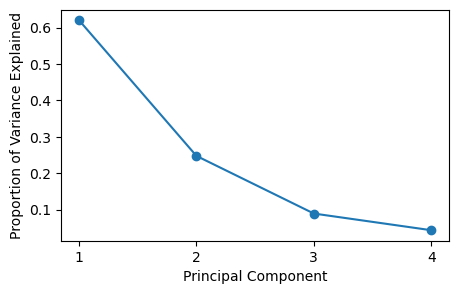

In [10]:
plt.figure(figsize=(5,3))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained', fontsize = 10)
plt.xlabel('Principal Component', fontsize = 10)
plt.xticks([1,2,3,4])
plt.show()

### IRIS 데이터세트

코드 출처: [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

많은 기계학습 문제에서 데이터를 시각화할 수 있으면 도움이 된다. 2차원 또는 3차원 데이터를 시각화하는 것은 어려운 일이 아니다. 그러나 4차원부터는 시각화가 불가능하다. 차원이 훨씬 높은 데이터의 경우에는 말할 것도 없다. 여기에서 예시적으로 다룰 IRIS 데이터세트는 4차원이다. 즉 변수가 4개이다. PCA를 사용하여 4차원 데이터를 2차원 또는 3차원으로 줄여 데이터를 더 잘 이해할 수 있다.

**데이터세트 로딩**

IRIS 데이터세트를 [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)에서 불러들인다.

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
IRIS = pd.read_csv(url,
            names=['sepal length','sepal width','petal length','petal width','target'])
IRIS

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**데이터세트 내용**

이 데이터세트는 아이리스(iris, 붓꽃) 150개 관측 표본에 대한 것이다. 영국의 통계학자이자 생물학자인 Ronald Fisher가 1936년 논문에서 선형판별분석(LDA: linear discriminant analysis)의 예로 사용한 데이터세트이다. 데이터는 3종의 아이리스 꽃(Iris setosa, Iris virginica, Iris versicolor) 각각 50개씩의 표본으로 구성돼 있다. 각 관측마다 4가지 특성(feature)이 기록돼 있는데, 꽃받침(sepal)과 꽃잎(petal)에 대해 길이 및 너비(단위: 센티미터)가 나와 있다. 

|Iris setosa|Iris versicolor|Iris virginica|
|:-:|:-:|:-:|
|![Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/330px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)|![Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg)|![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)|

출처: Wikipedia, "[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)".

**데이터 표준화**

PCA는 척도의 영향을 받으므로 PCA를 적용하기 전에 데이터 입력변수(특성)들을 동일한 척도로 맞출 필요가 있다. 사이킷런(`sklearn`)의 `StandardScaler()` 함수를 사용하면 데이터세트의 특성을 단위 척도(즉, 평균 = 0 및 분산 = 1)로 표준화(standardization)할 수 있다.(앞에서 사용한 `scale()` 함수와 사실상 동일하다.) 우선 데이터세트의 변수들을 입력변수(`x`)와 출력변수(`y`)로 나누고 입력변수에 대해 표준화를 적용한다.

In [12]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = IRIS.loc[:, features].values
y = IRIS.loc[:,['target']].values

In [13]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


**4D 데이터를 2D로 투영**

데이터세트에는 특성이 4개(`sepal length`, `sepal width`, `petal length`, `petal width`)가 있다. 아래 코드는 4차원인 데이터세트를 2차원으로 투영(projection)하는 것이다. `PCA()` 괄호안에 `n_components=2`로 기입하면 두 번째 주성분까지 계산된다. 그런 다음, `fit_transform()` 메서드를 사용하여 처음 2개 주성분 변수를 구한 것이다.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


**데이터 시각화**

아래는 위에서 구한 주성분 점수와 함께 각 관측이 어떤 종류의 아이리스 꽃에 속하는지(`target` 변수) 구분해 놓은 것이다.

In [15]:
finalDf = pd.concat([principalDf, IRIS[['target']]], axis = 1)
finalDf

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


아래는 150개 관측에 대해 첫 번째 주성분 점수를 가로축으로 하고, 두 번째 주성분 점수를 세로축으로 하여 산점도를 그린 것인데, 아이리스 꽃의 3개 종류별로 데이터 포인트의 색깔을 달리했다. 

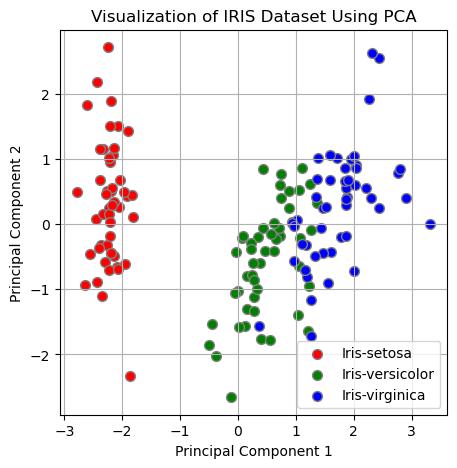

In [16]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Visualization of IRIS Dataset Using PCA', fontsize = 12)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c = color, s = 50, edgecolor = 'grey')
ax.legend(targets)
ax.grid()
plt.show()

위 결과를 보면, 색깔이 같은 점들끼리 상당히 몰려 있는 것을 알 수 있다. 즉 **클러스터링**(clustering)돼있다. 이는 데이터세트의 원래 4개 변수가 아니라 그것들을 결합해서 만든 첫 번째 주성분과 두 번째 주성분만으로도 3종의 아이리스 꽃이 상당히 잘 분류된다는 것을 의미한다. 2개의 주성분만으로도 원래 데이터세트의 특징을 잘 나타낼 수 있다는 의미이기도 하다. 여기에서 중요한 것은 위의 분석을 비지도(unsupervised) 방식으로 수행했다는 점이다. 즉 각 관측의 아이리스 꽃 종류가 무엇인지 참조하지 않고 PCA를 수행했다.

**설명된 분산 비중**

`PCA()` 함수의 속성인 `explained_variance_ratio_`을 사용하여 각 주성분에 의해 설명된 분산의 비중을 구할 수 있다. 즉 각 주성분에 얼마나 많은 정보(분산)가 귀속되는지를 알려준다. 

In [17]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

첫 번째 주성분은 전체 분산(즉 정보)의 72.8%를 설명하고, 두 번째 주성분은 분산의 23.0%를 설명한다. 처음 두 개의 주성분에 의해 설명된 분산의 비중이 95.8%이다. 세 번째와 네 번째 주성분이 데이터세트의 나머지 분산을 설명한다.

## 16.6 NCI60 데이터: 시각화

코드 출처: [PCA in Python](https://github.com/jcrouser/islr-python/blob/master/Lab%2018%20-%20PCA%20in%20Python.ipynb)

### 유전자 데이터 분석

비지도학습은 유전자 데이터 분석에 자주 사용된다. 특히 PCA는 유전자 데이터 분석에서 널리 사용되는 도구 중 하나다. 우리는 64개 종류의 암세포주(cancer cell lines)에 대한 6,830개의 유전자(gene) 발현값으로 구성된 NCI60 데이터에서 이러한 PCA 기법의 활용에 대해 알아보자. 

64개 암세포주는 NCI(National Cancer Institute)가 규정하는 암의 유형이다. 사실 PCA를 수행할 때 암 유형이 필요하지는 않다. 왜냐하면 PCA는 비지도 기법이기 때문이다. 그러나 PCA를 수행한 후 이러한 비지도 기법의 결과가 암 유형을 시각화하고 클러스터링에 효과적인지 확인해보기로 한다.

**데이터세트 로딩**

우선 데이터세트를 로딩한다. 데이터에는 64개의 행(암세포주)과 6,830개의 열(유전자 발현값)이 있다. 관측 개수($n$)가 64개이고, 변수(또는 특성)의 개수($p$)가 6,830개인 것이다.

In [18]:
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/\
Notebooks/Data/NCI60_X.csv'
NCI60 = pd.read_csv(url).drop('Unnamed: 0', axis=1)
NCI60.columns = np.arange(NCI60.columns.size)
print(NCI60.shape)
NCI60.head()

(64, 6830)


,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


나중 작업을 위해서 64개 암세포주의 유형을 읽어 놓는다. 

In [19]:
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/\
Notebooks/Data/NCI60_y.csv'
y = pd.read_csv(url, usecols=[1], skiprows=1, names=['type'])
y.head()

,type
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


아래는 64개 암 유형 중에서 중복된 것을 제거했을 때 몇 개 유형이 있는지 알아본 것으로, 총 14개 암 유형이 있다는 것을 알 수 있다. 

In [20]:
y.drop_duplicates().reset_index().drop(["index"], axis=1)

,type
0,CNS
1,RENAL
2,BREAST
3,NSCLC
4,UNKNOWN
5,OVARIAN
6,MELANOMA
7,PROSTATE
8,LEUKEMIA
9,K562B-repro


### 주성분 분석

**데이터 표준화**

우리는 먼저 각 변수(유전자 발현값)에 대해 평균을 0, 표준편차를 1로 표준화하여 PCA를 수행하기로 한다. 그런데 이 부분에서 각 유전자 변수들에 대해 **스케일링**(scaling)을 하지 않는 것이 더 낫다는 주장도 있을 수 있다. 즉 평균만 0으로 만들고, 표준편차를 통일하는 작업은 하지 않고 PCA를 수행하는 것이다. 이에 대해서는 바로 아래 참고 사항에 부연 설명이 나와 있다.

In [21]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(NCI60))

> **참고: PCA와 변수 스케일링**
> 출처: [ISLP](https://www.statlearning.com/), pp.512-513.
>
> 앞에서 PCA를 수행하기 전에 각 변수의 평균을 0으로 만드는 소위 **센터링**(centering)을 해야 한다고 언급했다. 또한 이와 함께 표준편차를 1로 만드는 것도 필요하다고 언급했다. 
>
> 변수 **스케일링**(척도화)은 변수에 어떤 상수를 곱하거나 나눠줌으로써 해당 변수가 취할 수 있는 값의 범위, 즉 척도를 변화시키는 것을 말한다. 변수를 표준화시킬 때 해당 변수를 그것의 표준편차로 나누는 것이 바로 스케일링이다. PCA를 수행할 때 각 변수를 스케일링하느냐에 따라 결과가 달라진다. 이것은 변수를 스케일링해도 결과에는 사실상 영향을 미치지 않는 선형 회귀 등 여타 지도 및 비지도학습 기법과는 대조된다.(가령 선형 회귀에서는 어떤 변수에 $c$를 곱하면 해당 계수 추정값이 원래 값의 $1/c$로 작아질 뿐 해당 변수의 통계적 유의성 등에는 전혀 영향을 미치지 않는다.)
>
> 앞의 `USArrest` 데이터세트 예에서 `Murder`, `Rape`, `Assault` 변수들은 단위가 100,000명당 각 범죄 발생 건수이며, `UrbanPop`은 도시 지역 거주 인구 비율(%)이다. 이들 4개 변수의 분산은 차례대로 19.0, 87.7, 6945.2, 209.5이다. 만약 모든 변수에 대해 표준편차를 1로 스케일링하지 않고 PCA를 수행하면, 첫 번째 주성분 부하량 벡터는 `Assault`에 대해 매우 큰 부하량을 부여할 것이다. 왜냐하면 그 변수의 분산이 가장 크기 때문이다. 이것은 스케일링을 통해 표준화시킨 변수들에 대해 PCA를 수행한 결과와는 크게 다르다. 우리가 앞의 5.1절에서 이미 본 것처럼 `USArrest` 데이터세트의 모든 변수를 표준화시킨 경우, 첫 번째 주성분 부하량은 `Murder`, `Rape`, `Assault` 변수에 대해 0.55 전후로 상당히 비슷하다. 
>
> 이처럼 변수를 측정한 척도만 바꿔도 PCA 결과는 크게 달라진다. 예를 들어 폭행(`Assault`)이 100,000명당이 아니라 100명당 발생 건수로 측정됐다고 해보자. 이는 해당 변수의 모든 원소를 1,000으로 나누는 것과 같다. 당연히 해당 변수의 분산이 크게 줄어들게 된다. 이런 상황에서 표준화 없이 PCA를 수행할 경우, 첫 번째 주성분에서 `Assault` 변수의 부하량은 (이번에는 정반대로) 매우 작은 값이 될 것이다. 이처럼 척도를 어떻게 선택하느냐에 따라 PCA 결과가 크게 달라지는 것은 바람직하지 않기 때문에 일반적으로 PCA를 수행하기 전에 표준편차가 1이 되도록 각 변수를 스케일링하는 작업을 거치게 된다.
>
> 그러나 어떤 상황에서는 변수들이 이미 동일한 단위로 측정되었을 수도 있다. 이 경우 PCA를 수행하기 전에 표준편차를 1로 만드는 스케일링을 하지 않는 것이 더 나을 수도 있다. 가령 이 절에서 다루고 있는 NCI60 데이터세트에서 $p$개 유전자 발현 수준 변수들이 동일한 "단위(unit)"로 측정되었다고 해보자. 이런 경우라면 각 유전자 변수의 표준편차를 1로 만드는 스케일링을 하지 않는 것이 더 나은 선택일 수 있다. 요컨대 PCA를 수행하기 전, 변수의 평균을 0으로 만드는 센터링은 반드시 필요하지만, 스케일링은 상황에 따라 하지 않을 수도 있다.

**주성분 점수**

이제 `sklearn`의 `PCA()` 함수를 `pca`이라는 이름으로 지정한 다음, 이를 바로 앞에서 표준화시킨 데이터세트 `X`에 피팅시킴과 동시에 `fit_transform()` 메서드를 사용하여 주성분 점수를 구한다. `PCA()`의 괄호안에 주성분의 개수를 따로 지정하지 않았기 때문에 63개 주성분 모두에 대해서 주성분 점수가 계산된다. 주성분의 개수는 최대 ${\rm min}(n − 1, p)$로서 여기에서는 63개이다. 아래 결과에는 64개 주성분 점수 열(column)이 있는데, 마지막 열은 모든 값이 사실상 0으로서 주성분이 아니다. 

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca_score = pd.DataFrame(pca.fit_transform(X))
print(pca_score.shape)
pca_score.head()

(64, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.838042,-3.555636,-9.812399,-0.824246,-12.609984,7.471505,14.190730,3.197977,-21.938350,-20.369363,...,-3.571612,11.111674,-6.336264,-9.077897,3.892561,3.240788,-0.446627,0.392266,0.894904,1.236942e-14
1,23.089215,-6.441460,-13.478251,5.635308,-8.035496,3.715178,10.143225,7.292724,-22.338284,-13.119764,...,3.378131,-5.232259,6.325341,7.665590,-3.938798,-4.018298,0.617127,-0.776330,-0.969009,1.236942e-14
2,27.456114,-2.465143,-3.533054,-1.341673,-12.564846,17.344925,10.354857,2.671282,0.234926,-6.357967,...,1.299500,-5.323021,4.867172,0.044978,-2.027836,1.089818,1.695444,0.498405,0.844418,1.236942e-14
3,42.816801,9.768358,-0.890073,3.445043,-42.269904,27.238815,17.520642,0.554341,-14.264354,15.969204,...,-0.342635,1.117879,-2.511719,-6.390061,3.429572,0.705737,1.372244,1.427329,-0.735637,1.236942e-14
4,55.418530,5.198897,-21.094558,15.849712,-10.443273,12.991051,12.597895,-32.513096,7.896805,-10.177263,...,-0.264565,2.311955,-2.926478,1.870319,-2.295689,-0.614378,-2.577214,-0.557610,0.576024,1.236942e-14


**데이터 시각화**

이제 데이터를 시각화하기 위해 처음 3개의 주성분 점수를 그림으로 그려보자. 가로축과 세로축은 주성분 변수이고, 64개 관측의 주성분 점수를 산점도로 그린 것이다. 동일한 암 유형에 해당하는 관측을 같은 색으로 표시했다. 이렇게 함으로써 (처음 3개의) 주성분만으로 암 유형을 시각화하는 것이 가능한지 확인해보자.

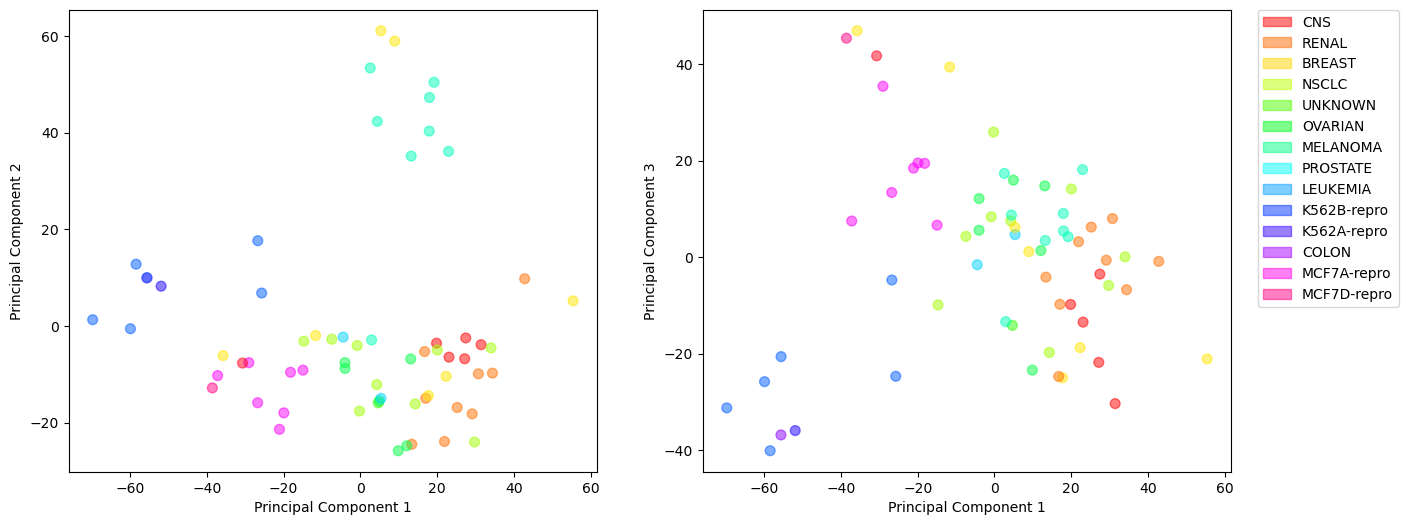

In [23]:
import matplotlib as mpl

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

ax1.scatter(pca_score.iloc[:,0], pca_score.iloc[:,1], c=color_idx, cmap=cmap, 
            alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

ax2.scatter(pca_score.iloc[:,0], pca_score.iloc[:,2], c=color_idx, cmap=cmap, 
            alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# 범례(legend)  
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# x축 레이블
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1') 
plt.show()

위 결과를 보면, 전체적으로 동일한 암 유형에 속하는 관측들이 (2개 주성분 변수의) 2차원 평면에서 서로 가까이 위치하는, 소위 클러스터링 경향이 있다. 이것은 동일한 암 유형의 세포주가 매우 유사한 유전자 발현 수준을 갖는 경향이 있음을 나타낸다. 단, 이때 유사한 유전자 발현이 원래 데이터의 6,830개 개별 유전자를 의미하는 것이 아니라 PCA에 의해 도출된 처음 3개의 주성분이라는 점이 중요하다. 사실 위와 같은 PCA에 의한 차원축소 방법을 사용하지 않고 데이터를 시각화하는 것은 거의 불가능하다. 왜냐하면 전체 데이터세트를 대상으로 한다면 $\binom{6,830}{2}=23,321,035$개의 산점도가 있고, 그 중 어느 것에서도 특별히 유익한 정보를 찾을 수 없을 가능성이 높기 때문이다. 우리는 이 예를 통해 PCA가 데이터세트의 중요한 정보를 주성분에 집약함으로써 데이터 시각화에 유용하게 활용될 수 있음을 알 수 있다.

**설명된 분산 비중**

다음은 처음 5개의 주성분 점수 벡터들에 대해 표준편차 및 설명된 분산 비중을 계산해 표로 만든 것이다. 여기에서 "Proportion of Variance"은 각 주성분의 개별적인 설명된 분산 비중이고, "Cumulative Proportion"은 설명된 분산 비중을 누계한 것이다. 아래 결과를 보면, 처음 5개 주성분이 데이터 전체 분산의 31.8%를 설명한다. 이 비율 자체는 그다지 크지 않지만, 원래의 변수 개수가 총 6,830개나 된다는 점을 감안해야 한다.

In [24]:
pd.DataFrame(
    [np.array(pca_score.iloc[:,:5].std(axis=0, ddof=0)),
     pca.explained_variance_ratio_[:5],
     np.cumsum(pca.explained_variance_ratio_[:5])],
    index = ['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


이번에는 각 주성분의 PVE(설명된 분산 비중)를 **스크리 그림**(scree plot: 산비탈 그림)으로 표현한 것이 왼쪽 그림이고, 오른쪽에는 "누적 PVE"를 그린 것이다. 

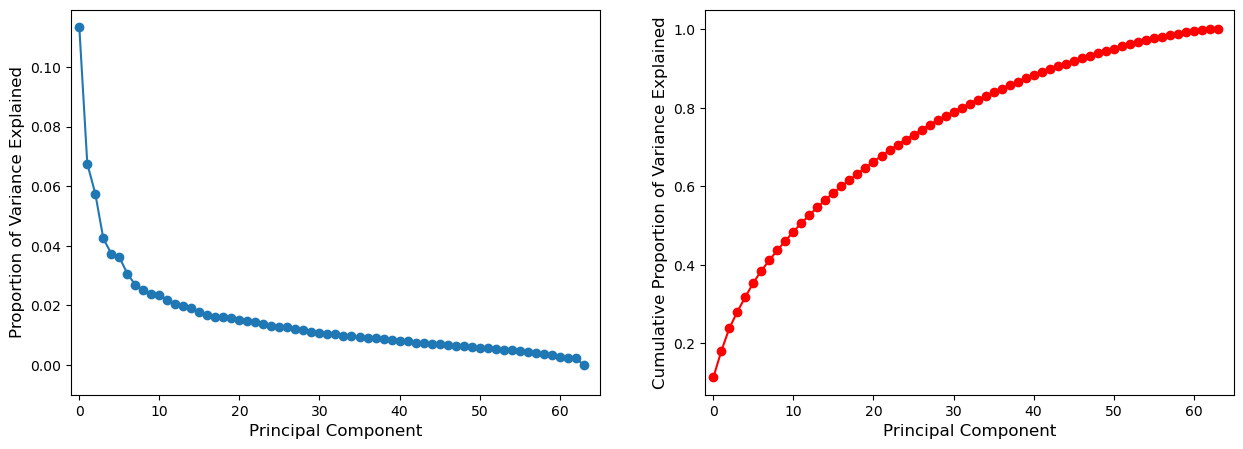

In [25]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# 왼쪽 그림
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained', fontsize = 12)
ax1.set_ylim(ymin=-0.01)

# 오른쪽 그림
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained', fontsize = 12)
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component', fontsize = 12)
    ax.set_xlim(-1,65)
plt.show()

위 결과를 보면, 처음 7개 주성분이 데이터 전체 분산의 약 40%를 설명한다는 것을 알 수 있다. 물론 40%가 큰 값은 아니다. 그러나 원래 데이터에 6,830개의 변수가 있다는 점을 감안해야 한다. 왼쪽 스크리 그림을 보면, 처음 7개의 주성분이 상당 양의 분산을 설명하며, 그 다음부터는 추가적인 주성분에 의해 설명되는 분산이 현저하게 줄어드는 것을 알 수 있다. 즉, 그림에서 대략 7번째 주성분을 경계로 꺾이는 소위 "엘보우(elbow)" 형태를 보인다. 이것은 7개보다 많은 주성분을 활용하는 것이 거의 이익이 없을 수 있음을 시사한다(7개의 주성분을 분석하는 것조차 어려울 수 있음).

## 16.7 손글씨 데이터: 노이즈 필터링

코드 출처: [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

### 데이터세트

차원축소의 유용성은 고차원 데이터를 보면 훨씬 더 명확해진다. 이를 확인하기 위해 15장에서 다뤘던 것과 유사한 손글씨 숫자 데이터에 PCA를 적용해보자. 데이터는 사이킷런(Scikit-Learn) 라이브러리에 내장된 데이터를 사용한다. 우선 `load_digits` 모듈을 불러들인 다음, 이것을 `digits`라는 이름으로 지정한다. 이 상황에서 `digits` 객체에 `images` 속성(attribute)을 적용하면 이미지 데이터세트를 얻는다. 이미지 데이터는 3차원 배열로서 1,797개의 관측이 있고, 각 관측은 $8\times8$ 픽셀 이미지로 구성돼있다. 

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

우선 데이터세트에서 처음 100개의 손글씨를 시각화해보자. 각 이미지마다 왼쪽 하단에 초록색의 작은 숫자가 있는데 이것이 해당 손글씨가 의미하는 숫자이다. 

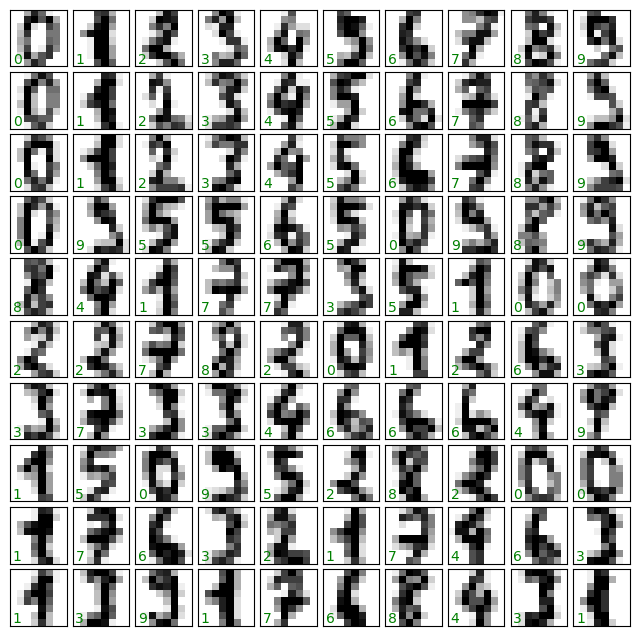

In [27]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
plt.show()

Scikit-Learn 내에서 이 데이터로 작업하려면 각 이미지의 픽셀 배열을 $8\times8$의 2차원 형태가 아니라 첫 번째 행부터 차례대로 붙여나감으로써 전체 8개 행을 하나의 벡터로 만드는 소위 평면화(flattening)를 하여 64개의 픽셀 별로 값을 갖도록 배치하는 것이 필요하다. 또한 각 이미지에 대해 그것이 어떤 숫자에 속하는지 레이블을 제공하는 목표(target) 변수가 필요하다. 우리가 사용하고 있는 `load_digits` 모듈의 경우, 이 두 가지 작업을 따로 코딩할 필요없이 해당 모듈의 `data` 및 `target`이라는 속성을 사용하면 된다. 즉 `digits.data`는 픽셀 배열이 평면화된 64개 변수를 가진 데이터이고, `digits.target`은 각 손글씨 관측이 어떤 숫자에 속하는지를 알려주는 데이터이다. 

In [28]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

### 노이즈 필터링 PCA

PCA는 노이즈가 있는 데이터에 대한 필터링 도구로도 사용할 수 있다. 아이디어는 다음과 같다. 큰 변동을 가진 주성분일수록 노이즈의 영향을 훨씬 덜 받게 된다. 따라서 처음 몇 개의 주요 주성분만 사용하여 데이터를 재구성하는 경우, 노이즈를 제거하면서도 보유 정보를 상당 부분 보존할 수 있을 것이다. 

먼저 픽셀 정보를 이미지로 바꿔주는 함수(`plot_digits`)를 만든다. 그런 다음, 노이즈가 없는 입력 데이터 중 처음 20개의 이미지를 봐보자.

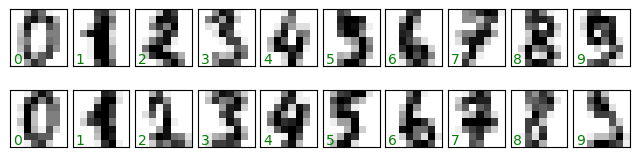

In [29]:
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(8, 2),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')
plot_digits(digits.data)
plt.show()

이제 주어진 데이터세트에 무작위 노이즈를 추가해보자. 아래 코딩에서 `np.random.normal(digits.data, 4)`은 노이즈가 없는 원래의 데이터에 평균이 0이고 표준편차가 4인 정규분포에서 무작위 숫자를 발생시켜 더한 것이다. 그렇게 하여 만든 데이터세트를 `noisy`란 이름으로 지정하고 이를 다시 그림으로 그린다.

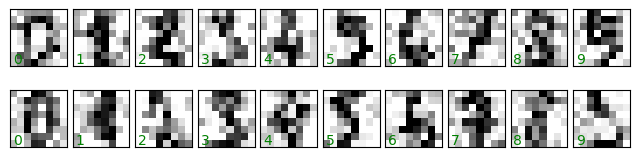

In [30]:
np.random.seed(123)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)
plt.show()

결과를 보면, 이미지에 가짜 픽셀이 포함되어 노이즈가 생긴 것을 확인할 수 있다. 

이제 `PCA(0.50)`으로 지정함으로써 주성분이 분산의 50%를 설명하도록 설정했다.(50% 수준은 대략적으로 정한 것임.) 주성분이 분산의 50%를 설명하도록 하기 위해서는 몇 개의 주성분이 필요한지 `n_components_` 속성을 이용해 알아보자.

In [31]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

위 결과는 데이터세트 분산의 50%를 설명하기 위해서는 12개의 주성분이 필요하다는 것을 말해준다. 따라서 먼저 `fit_transform` 메서드를 이용해 처음 12개 주성분 점수를 계산한다. 그런 다음 `inverse_transform` 메서드를 사용해 계산된 주성분 점수를 원래의 차원으로 역변환함으로써 필터링된 숫자를 재구성하여 이를 그림으로 그린다.

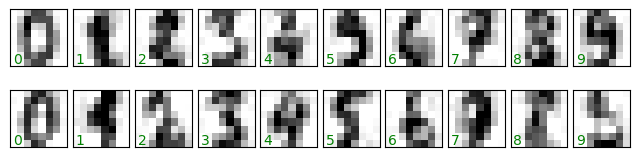

In [32]:
components = pca.fit_transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
plt.show()

위 결과를 보면, PCA의 노이즈 필터링(신호 보존) 기능이 상당히 잘 작동한 것으로 여겨진다. 즉, 주성분을 이용해 데이터세트의 노이즈를 잘 제거한 것이다. 

위 예를 통해, PCA가 매우 유용한 변수 선택 루틴으로 활용될 수 있을 것으로 짐작할 수 있다. 예를 들어, 분류기(classifier)를 매우 고차원 데이터에 대해 훈련시키는 대신, PCA로 노이즈를 필터링하는 단계를 자동으로 거치게 함으로써 분류기를 저차원 표현에 대해 훈련시키는 것이다. 

## 16.8 MNIST 데이터: 주성분 회귀

코드 출처: [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

지금까지는 비지도학습으로서의 PCA 기법에 대해 살펴보았다. 그런데 맨 앞에서도 언급했듯이 PCA는 지도학습에서도 유용하게 활용될 수 있다. 대표적으로 입력변수가 너무 많아 학습 알고리즘이 너무 느린 경우, PCA를 사용하여 차원을 축소함으로써 학습 속도를 높이는 방법을 생각해볼 수 있다. 여기에서는 이것을 15장 딥러닝에서 다루었던 MNIST 데이터세트에 대해 PCA를 적용해보기로 한다. 

15장에서 우리는 MNIST 손글씨 분류를 로지스틱 회귀 모델로 수행한 적이 있다. 그런데 모델은 로지스틱 회귀였지만, 효율적인 추정을 위해 신경망 추정 기법을 이용했다. 원래 다항(multinomial) 로지스틱 모델은 사이킷런의 `LogisticRegression` 함수를 사용해서 추정하나, 15장에서는 그 대신 `keras`의 신경망 추정 기법으로 로지스틱 모델을 피팅했다. 그렇게 했던 이유는 추정해야 하는 계수가 너무 많기 때문이다. MNIST 손글씨 분류 문제의 경우, 입력변수가 784개(상수항까지 포함하면 785개)나 되고, 출력변수의 클래스도 10개나 되기 때문에 추정 계수의 숫자가 총 7,850개나 된다. 이런 경우에 PCA를 활용하여 입력변수의 차원을 대폭 줄일 수 있다면, (`LogisticRegression` 함수를 사용하더라도) 모델 피팅에 걸리는 시간을 대폭 줄일 수 있을 것이다. 메모리 공간에 제약이 있을 경우, PCA는 데이터 정보의 일부 손실을 감수하는 대신 메모리 공간과 실행 시간을 절약할 수 있는 합리적인 절충안이 될 수 있다.

### 주성분 회귀


앞에서 여러 차례 보았듯이, 회귀 분석에서 반응변수 $Y$와 예측변수 $X_1,X_2,...,X_p$가 주어졌을 때, 이들의 관계를 설명하는 표준적인 선형 모델은 다음과 같다.

$$
Y = \beta_0 + \beta_{1}X_1 + \dots + \beta_{p}X_p  + \epsilon \tag{16.6}
$$ 

우리는 9장(선형모형 변수선택 및 정규화)에서 원래(original) 변수의 부분집합을 사용하는 방법, 그리고 계수를 0으로 줄이는 소위 "정규화"의 방법으로 추정 계수의 분산을 제어하고자 했다. 부분집합 선택이든 정규화 기법이든 이러한 방법들은 원래의 예측변수 $X_1,X_2,...,X_p$를 변환시키지 않고 그대로 사용하는 접근법이라는 점에서는 동일하다.  

반면, 여기에서 다룰 PCA에 의한 **차원축소**(dimension reduction) 기법은 원래의 예측변수를 그대로 사용하는 것이 아니라 이들 예측변수를 주성분 변수로 **변환**(transform)한 다음, 그중 일부 주요 주성분 변수를 사용하여 최소제곱 모델을 피팅하는 접근 방식이다. 이를 식으로 표현해보면, 우선 $Z_1,Z_2,...,Z_m$은 다음과 같이 $p$개 예측변수의 선형결합으로 만든 $m(< p)$개의 (선택된) 주요 주성분 변수이다. 

$$
Z_j = \phi_{1j}X_1 + \phi_{2j}X_2 + \dots + \phi_{pj}X_p \tag{16.7}
$$ 

여기에서 $j = 1,...,m$이고, $\phi_{1j},\phi_{2j},...,\phi_{pj}$은 상수이다. **주성분 회귀**(PCR: principal components regression)는 주성분 변수 $Z_1,Z_2,...,Z_m$을 구한 후, 다음과 같은 선형 회귀 모델을 최소제곱으로 피팅한다.

$$
Y = \theta_0 + \theta_{1}Z_1 + \theta_{2}Z_2 + \dots + \theta_{m}Z_m  + \epsilon \tag{16.8}
$$ 

주요 주성분이 잘 도출되면, 위와 같은 차원축소 접근 방식이 원래의 최소제곱 회귀보다 더 좋은 성과를 제공할 수도 있다. 즉, 식 16.6 대신 식 16.8을 최소제곱으로 피팅함으로써 메모리나 시간을 절약하는 것은 물론이고, $Y$를 예측하는 데 있어서도 오히려 더 나은 결과를 가져다 주기도 한다.

차원축소라는 용어는 이 접근 방식이 $\beta_{0},\beta_{1},...,\beta_{p}$를 추정하는 문제를 $\theta_1,\theta_2,...,\theta_m$을 추정하는 더 간단한 문제로 축소시킨다는 사실에서 비롯된 것이다. 즉 $m < p$으로서 계수의 차원이 $p + 1$에서 $m + 1$로 축소되었다.

### Keras 및 데이터세트 불러들이기

MNIST 데이터베이스에는 60,000개의 훈련 이미지와 10,000개의 테스트 이미지가 들어있다. 데이터베이스에 총 70,000개의 손글씨 숫자들이 들어있다. 여기에서 우리의 목표는 다항 로지스틱 모델로 손글씨 숫자 이미지를 올바르게 분류하는 모델을 구축하는 것이다. 

파이썬에 텐서플로(TensorFlow)가 설치돼 있지 않으면 아나콘다 프롬프트 창에서 다음 명령문을 실행하여 텐서플로를 설치한다. 텐서플로는 구글에서 개발한 기계학습 및 인공지능을 위한 무료 오픈 소스 소프트웨어 라이브러리이다. 

    (base) C:\Users\pilsu>pip install tensorflow


설치가 끝났으면 주피터 노트북에서 아래와 같이 `mnist`를 불러들인다. `keras` 패키지에는 여러 예제 데이터세트가 들어있는데, MNIST 데이터베이스도 `mnist`라는 이름으로 들어있다. 아래 코드로 데이터세트를 로드하면, `train_img`, `train_lbl`, `test_img`, `test_lbl`라는 4개의 변수가 생긴다. 여기서 `img`는 손글씨 이미지 데이터이고 `lbl`은 출력변수로서 각 숫자 이미지가 어떤 숫자를 나타내는지를 분류해놓은 클래스(레이블)이다. `img` 변수의 훈련 데이터(`train_img`)와 테스트 데이터(`test_img`)는 각각 60,000개와 10,000개 이미지에 대한 픽셀 정보이며, 모든 이미지는 동일한 크기($28\times28$ 픽셀)로 돼있다. 즉 `img` 데이터세트는 훈련 세트와 테스트 세트 모두 3차원 배열(array)로서 훈련 세트의 형태는 $60,000\times28\times28$이고, 테스트 세트는 $10,000\times28\times28$이다. 이에 반해 `lbl` 데이터세트는 훈련 세트와 테스트 세트 모두 관측별로 클래스 레이블(target label)만 들어있는 1차원 배열이다. 

In [33]:
from keras.datasets import mnist
(train_img, train_lbl),(test_img, test_lbl) = mnist.load_data()
train_img.shape, train_lbl.shape, test_img.shape, test_lbl.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**픽셀 정보 평면화**

`img` 데이터세트의 각 숫자 이미지는 $28\times28=784$ 픽셀에 대해 회색조 스케일 값을 지니고 있다. 이렇게 각 숫자 이미지에 대해 2차원으로 기록된 픽셀 데이터를 첫 번째 행부터 차례대로 붙여나감으로써 전체 28개 행을 하나의 벡터로 만드는 소위 평면화를 실행한다. 이 작업은 아래와 같이 `numpy`의 `reshape` 함수를 사용하면 된다. `np.reshape(train_img, (60000, 784))`은 `train_img` 데이터세트의 60,000개 관측 각각의 픽셀 정보 형태(shape)를 784개 원소를 가진 배열로 평면화하라는 것이다. 

In [34]:
train_img = np.reshape(train_img, (60000, 784))
test_img = np.reshape(test_img, (10000, 784))
train_img.shape, train_lbl.shape, test_img.shape, test_lbl.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### 다항 로지스틱 회귀

아래 명령문은 먼저 사이킷런에서 `LogisticRegression` 함수를 불러들여 최적화 관련 옵션을 설정하고, 모델명을 `logisticRegr`으로 지정했다. 우선 피팅의 최적화 알고리즘으로서 (기본 알고리즘으로 설정돼 있는) `lbfgs`를 선택했다. 이는 quasi-Newton 방법에 속하는 Broyden-Fletcher-Goldfarb-Shanno 알고리즘을 사용하는 최적화 알고리즘이다. 최적화는 반복적 수치최적화(iterative numerical optimization) 방법으로 진행되는데, 우리는 최대반복횟수(`max_iter`)를 10,000번으로 설정했다. 그렇게 하여 로지스틱 모델(`logisticRegr`)을 MNIST 훈련 세트(`train_img` 및 `train_lbl`)에 피팅시켰다. 

한편 피팅에 걸리는 시간을 재기 위해 `time` 모듈을 불러들여 로지스틱 회귀의 시작 시점과 끝나는 시점의 시간을 측정했다. `time.time()`은 인터프리터가 실행되는 시점을 소수점 숫자로 반환한다. 

![다항 로지스틱 회귀](https://raw.githubusercontent.com/pilsunchoi/images/main/16-5.png)

위 결과를 보면, 피팅 작업을 25분가량 수행했지만, 정해진 최적화 기준에 도달하지 못한 채, 최대반복횟수(`max_iter`) 10,000번을 초과함으로써 최적화 작업이 중단된 것을 알 수 있다. 경고 문구인 "ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."이 그것을 의미한다. `LogisticRegression` 함수의 최대반복횟수의 기본값(default)이 100인데, 우리는 그것을 10,000으로 늘렸음에도 불구하고 최적화에 도달하지 못한 것이다. 이는 추정해야 하는 변수의 개수가 너무 많기 때문일 것이다. 이 점에서 PCA에 의해 변수 개수를 축소할 필요성이 제기된다.

**모델 정확도**

최적화가 도중에 중단됐음에도 불구하고, 어찌됐든 위의 피팅 결과를 바탕으로 테스트 세트의 처음 10개 손글씨에 대해 모델의 정확도를 체크해보았다. 각 손글씨 이미지가 0에서 9까지의 숫자 중 어디에 속하는지 `LogisticRegression`의 `predict` 메서드로 예측한 다음, 그것을 실제값과 비교했다. 아래 결과를 보면 10개 이미지 중 아홉 번째를 제외하고는 모두 올바르게 예측됐음을 알 수 있다.

![모델 정확도](https://raw.githubusercontent.com/pilsunchoi/images/main/16-6.png)

이번에는 `LogisticRegression`의 `score` 메서드를 이용해 테스트 세트의 10,000개 손글씨 전체에 대해 예측 정확도를 구한 결과, 92.08%가 나왔다. 즉 오류율이 7.92%이다.

![예측 정확도](https://raw.githubusercontent.com/pilsunchoi/images/main/16-7.png)

### 다항 로지스틱 주성분 회귀

동일한 MNIST 데이터세트 손글씨 인식 작업을 이번에는 로지스틱 **주성분 회귀**로 시도해보자. 다른 부분은 앞의 일반적인 로지스틱 회귀와 모두 동일하고, 입력변수를 원래의 784개 픽셀 정보 대신 PCA를 통해 도출한 주요 주성분 변수를 사용한다는 점만 다르다.

**데이터 표준화**

우리는 PCA를 입력변수 세트인 이미지(`img`) 데이터세트에 대해 적용하기 때문에, `train_img`와 `test_img`의 두 가지 데이터세트를 표준화시킨다(출력변수는 표준화시키지 않음). 단, 이때 (테스트 세트는 사전에 주어지지 않는 것으로 간주해야 하기 때문에) 훈련 세트에 대한 표준화 피팅을 테스트 세트에도 그대로 적용한다. 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 훈련 세트에만 피팅을 하고
scaler.fit(train_img)
# 그것을 훈련 세트 및 테스트 세트에 동일하게 적용함
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

**설명된 분산 비중 80%로 설정**

이제 `PCA(0.80)`로 지정함으로써 주성분이 분산의 80%를 설명하도록 주성분을 선택한다(80% 수준은 대략적으로 정한 것임). 아래 결과를 보면, 이 경우 149개의 주성분이 필요한 것으로 나타났다. 

In [36]:
pca = PCA(0.80)
pca.fit(train_img)
pca.n_components_

149

**이미지 데이터세트를 주성분 변수로 대체**

이제 훈련 이미지(`train_img`) 세트로부터 도출한 PCA 정보를 바탕으로 이미지 데이터세트의 훈련 세트(`train_img`)와 테스트 세트(`test_img`) 모두에 대해 `transform` 메서드를 이용해 처음 149개 주성분 점수를 계산한다. 훈련 이미지 세트의 주성분 점수(`train_pca_img`)는 곧이어 실행할 로지스틱 주성분 회귀에 필요한 것이고, 테스트 이미지 세트의 주성분 점수(`test_pca_img`)는 모델의 정확도를 평가하는 데 필요하다. 

In [37]:
train_pca_img = pca.transform(train_img)
test_pca_img = pca.transform(test_img)

**로지스틱 주성분 회귀 실행**

앞에서와 마찬가지로 `LogisticRegression` 함수를 사용하는데, 최적화 관련 옵션을 앞에서와 동일하게 설정했다. 즉 피팅의 최적화 알고리즘으로서 `lbfgs`를 선택하고, 최대반복횟수(`max_iter`)를 10,000번으로 설정했다. 그렇게 하여 로지스틱 모델(`logisticRegr`)을 훈련 세트(`train_pca_img` 및 `train_lbl`)에 피팅시켰다. 이때 훈련 세트 중 이미지 세트는 주성분 변수로 변형시킨 데이터세트를 사용한다는 점이 앞의 일반적인 로지스틱 회귀와 다른 점이다. 

In [38]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 10000, random_state=1)
logisticRegr.fit(train_pca_img, train_lbl)

end = time.time()
m = divmod((end - start), 60)
print(round(m[0], 0), "minute(s) ", round(m[1], 2), "seconds")

0.0 minute(s)  9.88 seconds


위 결과를 보면, 최적화에 걸린 시간이 매우 짧다. 앞에서 PCA를 사용하지 않고 로지스틱 회귀를 실행한 것과는 실행 시간 면에서 크게 비교가 된다. PCA를 통해 추정 계수의 개수를 크게 줄인 것이 이러한 차이를 낳는 가장 큰 요인일 것이다. 그렇다면 이처럼 추정에 있어서의 효율성을 얻는 대신, 예측의 정확도 면에서 얼마만큼의 손실이 발생했는지 확인해볼 필요가 있다. 

**모델 정확도**

앞에서와 마찬가지로 (주성분 회귀) 피팅 결과를 바탕으로 테스트 세트의 처음 10개 손글씨에 대해 모델의 정확도를 체크해보았다. 각 손글씨 이미지가 0에서 9까지의 숫자 중 어디에 속하는지 `predict` 메서드로 예측한 다음, 그것을 실제값과 비교해보자. 이때 앞에서 만들어 놓은 `test_pca_img` 데이터세트를 사용해야 한다. 즉 테스트 이미지 세트를 그대로 사용하는 것이 아니라 훈련 이미지 세트에 대한 주성분 분석을 바탕으로 테스트 이미지 세트를 주성분 점수로 변형시킨 데이터세트이다. 

아래 결과를 보면 10개 이미지 중 아홉 번째를 제외하고는 모두 올바르게 예측됐음을 알 수 있다. 이는 앞에서 PCA를 사용하지 않은 로지스틱 회귀 모델과 동일한 결과이다. 

In [39]:
print("Predict:", logisticRegr.predict(test_pca_img[0:10]))
print("True   :", test_lbl[0:10])

Predict: [7 2 1 0 4 1 4 9 6 9]
True   : [7 2 1 0 4 1 4 9 5 9]


이번에는 `score` 메서드를 이용해 테스트 세트의 10,000개 손글씨 전체에 대해 예측 정확도를 구했다. 아래 결과를 보면 92.55%이다. 즉 오류율이 7.45%로서 앞의 PCA를 사용하지 않은 로지스틱 회귀 모델(오류율 7.92%)보다 오히려 약간 낮은 수준이다. 즉 PCA를 통해 입력변수의 차원을 대폭 줄임으로써 피팅의 속도를 대폭 단축했음에도 불구하고, 모델의 정확성 손실은 발생하지 않은 것이다. 주성분 회귀 모델의 오류율이 오히려 낮아진 것은 아마도 PCA를 사용하지 않은 로지스틱 회귀 모델의 경우 최적화 작업이 최대반복횟수 제한에 걸려 끝까지 수행되지 않았기 때문일 것이다. 

In [40]:
score = logisticRegr.score(test_pca_img, test_lbl)
print(score)

0.9257


## 참고: PCA의 한계

출처: [Principal Component Analysis limitations and how to overcome them](https://ekamperi.github.io/mathematics/2021/02/23/pca-limitations.html)

빅데이터 시대에 PCA는 분명 널리 사용되는 유용한 차원축소 기법이지만, 몇 가지 한계점도 지니고 있다. 마지막으로 이를 간단히 정리했다.

- PCA를 적용하고 의미 있는 결과를 생성하려면 변수간 **선형 상관관계**(linear correlation)가 존재해야 한다.


- PCA는 데이터세트 변수 간의 선형 관계에 의존한다. 그런데 상관성은 있지만 선형이 아니라 **비선형 상관성**이 존재하면 주성분 분석에서 얻는 이익에 한계가 있다. 


- PCA에서 주성분들은 서로 **직교**하는데, 상황에 따라서는 직교하지 않은 축이 오히려 데이터 요약에 훨씬 더 나을 수도 있다. 


- PCA에서는 **분산**이 데이터의 정보 존재에 대한 기준으로 사용된다. 하지만 때로는 분산이 낮은 곳에서 정보가 발견될 수도 있다.


- PCA는 변수의 **척도**(scale)에 따라 결과가 달라진다. 큰 값을 가진 변수일수록 전체 분산에 더 많이 기여하는 방식으로 작동하기 때문이다.


- PCA의 핵심은 데이터세트의 차원을 줄이는 것이다. 그런데 전체 주성분 중 **몇 개의 주성분**을 사용하는 것이 좋은지 기준을 정하기 어렵다. 자주 사용되는 접근 방식에는 스크리 그림에서 소위 "엘보우"를 찾는 시각적 검사, 그리고 주성분이 전체 분산의 가령 70%나 80% 이상을 설명하도록 하는 방법, 고유값이 1보다 큰 주성분을 선택하는 방법들이 있지만 어떤 기준이든 자의적인 측면이 존재할 수밖에 없다. 


- PCA의 또 다른 중요한 한계는 **해석가능성**(interpretability)이다. 원래 변수를 주성분으로 교체한 후에는 결과를 해석하는 것이 쉽지 않다. 주성분이 원래 변수의 선형결합으로 만든 것이기 때문이다. 때로는 주성분의 해석을 단순화하기 위해 PCA 후에 회전(rotation)을 적용할 수 있다. Varimax 회전이나 사각(oblique) 회전 등이 있지만, 이러한 회전에도 나름의 제한 사항이 있다. 